In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from datetime import datetime
import pickle
from comparers import ModelComparer
import matplotlib.pyplot as plt
from IPython.display import display
from util import RuleClassifier, find_counterfactuals, counterfactuals_to_constraint_matrix,\
                 evaluate_counterfactual_fidelity, get_complexity
from surrogate_tree import train_surrogate_tree, tree_to_rules, plot_surrogate_tree,\
                 get_feature_importances, plot_feature_importances, plot_tree_leafs_for_class,\
                 tree_to_constraint_matrix, constraint_matrix_to_rules, extract_rules, print_rules,\
                 evaluate
from tasks.boston_housing import make_task3 as make_task

In [2]:
clf_a, clf_b, X, y, feature_names, categorical_features, feature_precisions = make_task()
comparer = ModelComparer(clf_a, clf_b, feature_names)

Trying to unpickle estimator LabelBinarizer from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator MLPClassifier from version 0.24.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.


# Explanations

In [3]:
mclass_diff = comparer.predict_mclass_diff(X)

In [4]:
ground_truth_per_class = {}
for label in comparer.difference_class_names:
    with open(f'ground_truth.{label}.pickle', 'rb') as f:
        ground_truth_per_class[label] = pickle.load(f)

In [5]:
global_fidelities = {}
local_fidelities = {}
complexities = {}

Trees with depths below 7 are not complex enough to describe all instances of the difference classes.

In [6]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=2)
evaluate(model, X, mclass_diff, comparer.class_names);

              precision    recall  f1-score   support

      (0, 0)       0.86      0.86      0.86        76
      (0, 1)       0.00      0.00      0.00        13
      (1, 1)       0.65      0.95      0.77        58
      (1, 2)       0.00      0.00      0.00         1
      (2, 1)       0.00      0.00      0.00         3
      (2, 2)       0.98      0.88      0.93        95

    accuracy                           0.83       246
   macro avg       0.41      0.45      0.43       246
weighted avg       0.80      0.83      0.81       246

CPU times: user 17.3 ms, sys: 4.43 ms, total: 21.7 ms
Wall time: 23.1 ms


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


,Precision,Recall,F1 Score,Support
"(0, 0)",0.855263,0.855263,0.855263,76
"(0, 1)",0.000000,0.000000,0.000000,13
"(1, 1)",0.654762,0.948276,0.774648,58
"(1, 2)",0.000000,0.000000,0.000000,1
"(2, 1)",0.000000,0.000000,0.000000,3
"(2, 2)",0.976744,0.884211,0.928177,95


In [7]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=3)
evaluate(model, X, mclass_diff, comparer.class_names);

              precision    recall  f1-score   support

      (0, 0)       0.90      0.96      0.93        76
      (0, 1)       0.60      0.23      0.33        13
      (1, 1)       0.89      0.95      0.92        58
      (1, 2)       0.00      0.00      0.00         1
      (2, 1)       1.00      0.33      0.50         3
      (2, 2)       0.97      0.99      0.98        95

    accuracy                           0.92       246
   macro avg       0.73      0.58      0.61       246
weighted avg       0.91      0.92      0.91       246

CPU times: user 14.3 ms, sys: 2.86 ms, total: 17.1 ms
Wall time: 20.2 ms


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


,Precision,Recall,F1 Score,Support
"(0, 0)",0.901235,0.960526,0.929936,76
"(0, 1)",0.600000,0.230769,0.333333,13
"(1, 1)",0.887097,0.948276,0.916667,58
"(1, 2)",0.000000,0.000000,0.000000,1
"(2, 1)",1.000000,0.333333,0.500000,3
"(2, 2)",0.969072,0.989474,0.979167,95


In [8]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=4)
evaluate(model, X, mclass_diff, comparer.class_names);

              precision    recall  f1-score   support

      (0, 0)       0.93      0.97      0.95        76
      (0, 1)       0.83      0.38      0.53        13
      (1, 1)       0.90      0.98      0.94        58
      (1, 2)       0.00      0.00      0.00         1
      (2, 1)       0.75      1.00      0.86         3
      (2, 2)       1.00      0.98      0.99        95

    accuracy                           0.94       246
   macro avg       0.74      0.72      0.71       246
weighted avg       0.94      0.94      0.94       246

CPU times: user 16.1 ms, sys: 3.31 ms, total: 19.4 ms
Wall time: 20.1 ms


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


,Precision,Recall,F1 Score,Support
"(0, 0)",0.925000,0.973684,0.948718,76
"(0, 1)",0.833333,0.384615,0.526316,13
"(1, 1)",0.904762,0.982759,0.942149,58
"(1, 2)",0.000000,0.000000,0.000000,1
"(2, 1)",0.750000,1.000000,0.857143,3
"(2, 2)",1.000000,0.978947,0.989362,95


In [9]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=5)
evaluate(model, X, mclass_diff, comparer.class_names);

              precision    recall  f1-score   support

      (0, 0)       0.99      0.99      0.99        76
      (0, 1)       0.85      0.85      0.85        13
      (1, 1)       0.97      0.97      0.97        58
      (1, 2)       1.00      1.00      1.00         1
      (2, 1)       1.00      1.00      1.00         3
      (2, 2)       1.00      1.00      1.00        95

    accuracy                           0.98       246
   macro avg       0.97      0.97      0.97       246
weighted avg       0.98      0.98      0.98       246

CPU times: user 15.4 ms, sys: 2.01 ms, total: 17.4 ms
Wall time: 18.5 ms


,Precision,Recall,F1 Score,Support
"(0, 0)",0.986842,0.986842,0.986842,76
"(0, 1)",0.846154,0.846154,0.846154,13
"(1, 1)",0.965517,0.965517,0.965517,58
"(1, 2)",1.000000,1.000000,1.000000,1
"(2, 1)",1.000000,1.000000,1.000000,3
"(2, 2)",1.000000,1.000000,1.000000,95


In [10]:
%%time
model = train_surrogate_tree(X, mclass_diff, max_depth=6)
evaluate(model, X, mclass_diff, comparer.class_names);

              precision    recall  f1-score   support

      (0, 0)       0.97      1.00      0.99        76
      (0, 1)       1.00      0.92      0.96        13
      (1, 1)       1.00      0.98      0.99        58
      (1, 2)       1.00      1.00      1.00         1
      (2, 1)       1.00      1.00      1.00         3
      (2, 2)       1.00      1.00      1.00        95

    accuracy                           0.99       246
   macro avg       1.00      0.98      0.99       246
weighted avg       0.99      0.99      0.99       246

CPU times: user 10.7 ms, sys: 1.91 ms, total: 12.6 ms
Wall time: 19.4 ms


,Precision,Recall,F1 Score,Support
"(0, 0)",0.974359,1.000000,0.987013,76
"(0, 1)",1.000000,0.923077,0.960000,13
"(1, 1)",1.000000,0.982759,0.991304,58
"(1, 2)",1.000000,1.000000,1.000000,1
"(2, 1)",1.000000,1.000000,1.000000,3
"(2, 2)",1.000000,1.000000,1.000000,95


## Tree with Depth 7

In [11]:
%%time
max_depth = 7
model = train_surrogate_tree(X, mclass_diff, max_depth=max_depth)
evaluate(model, X, mclass_diff, comparer.class_names);

              precision    recall  f1-score   support

      (0, 0)       0.99      1.00      0.99        76
      (0, 1)       1.00      1.00      1.00        13
      (1, 1)       1.00      0.98      0.99        58
      (1, 2)       1.00      1.00      1.00         1
      (2, 1)       1.00      1.00      1.00         3
      (2, 2)       1.00      1.00      1.00        95

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246

CPU times: user 14.1 ms, sys: 2.52 ms, total: 16.6 ms
Wall time: 24 ms


,Precision,Recall,F1 Score,Support
"(0, 0)",0.987013,1.000000,0.993464,76
"(0, 1)",1.000000,1.000000,1.000000,13
"(1, 1)",1.000000,0.982759,0.991304,58
"(1, 2)",1.000000,1.000000,1.000000,1
"(2, 1)",1.000000,1.000000,1.000000,3
"(2, 2)",1.000000,1.000000,1.000000,95


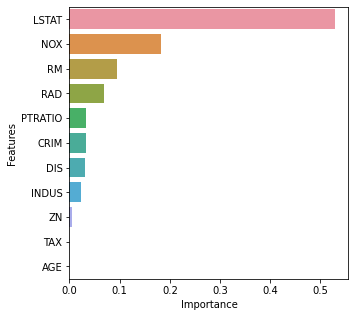

In [12]:
feature_importances, feature_order = get_feature_importances(model)
plot_feature_importances(feature_names, feature_importances, feature_order, figsize=(5, 5))

In [13]:
constraints, rules, class_occurences, labels, instance_indices_per_rule =\
    extract_rules(model, feature_names, comparer.difference_classes, X, mclass_diff)
print_rules(rules, class_occurences, comparer.class_names, labels)

1. CRIM <= 0.9839633405208588 and NOX > 0.5909999907016754 and 16.290000438690186 < LSTAT <= 17.722667694091797 => (0, 1) [0, 4, 0, 0, 0, 0]
2. 0.5909999907016754 < NOX <= 0.6180000007152557 and 9.477545261383057 < LSTAT <= 12.607422828674316 => (0, 1) [0, 3, 0, 0, 0, 0]
3. CRIM <= 1.4226450324058533 and NOX <= 0.5909999907016754 and PTRATIO > 20.600000381469727 and LSTAT > 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
4. INDUS > 8.005000114440918 and NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and 16.715493202209473 < LSTAT <= 17.515000343322754 => (0, 1) [0, 2, 0, 0, 0, 0]
5. NOX <= 0.7439999878406525 and RM <= 6.61963152885437 and DIS > 1.4821309447288513 and RAD > 6.0 and LSTAT <= 9.477545261383057 => (2, 1) [0, 0, 0, 0, 2, 0]
6. CRIM > 0.9839633405208588 and NOX > 0.5909999907016754 and 14.144999980926514 < LSTAT <= 14.309999942779541 => (0, 1) [0, 1, 0, 0, 0, 0]
7. INDUS <= 13.90500020980835 and NOX <= 0.5909999907016754 and DIS > 2.271081805229187 and PTRATIO <= 16.5

## Evaluation

### Global Fidelity

In [14]:
global_fidelities[max_depth] = evaluate(model, X, mclass_diff, comparer.class_names)

              precision    recall  f1-score   support

      (0, 0)       0.99      1.00      0.99        76
      (0, 1)       1.00      1.00      1.00        13
      (1, 1)       1.00      0.98      0.99        58
      (1, 2)       1.00      1.00      1.00         1
      (2, 1)       1.00      1.00      1.00         3
      (2, 2)       1.00      1.00      1.00        95

    accuracy                           1.00       246
   macro avg       1.00      1.00      1.00       246
weighted avg       1.00      1.00      1.00       246



### Counterfactual Fidelity Error

#### (0, 1)

In [15]:
focus_class_idx, focus_class = comparer.check_class('(0, 1)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [16]:
errors, statistics = evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices,
                                                      ground_truth, instance_indices_per_rule_focus,
                                                      constraints_focus)

invalid value encountered in true_divide
invalid value encountered in true_divide


In [17]:
local_fidelities[(max_depth, focus_class)] = statistics
statistics

,RMSE,BMR,BAR
CRIM,0.794867,0.631579,0.0
ZN,NaN,1.000000,NaN
INDUS,1.681197,0.850000,0.0
NOX,NaN,NaN,1.0
RM,NaN,1.000000,NaN
AGE,NaN,1.000000,NaN
DIS,NaN,1.000000,1.0
RAD,NaN,1.000000,NaN
TAX,NaN,1.000000,NaN
PTRATIO,0.432782,0.833333,0.0


#### (1, 2)

In [18]:
focus_class_idx, focus_class = comparer.check_class('(1, 2)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [19]:
errors, statistics = evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices,
                                                      ground_truth, instance_indices_per_rule_focus,
                                                      constraints_focus)

invalid value encountered in true_divide
invalid value encountered in true_divide


In [20]:
local_fidelities[(max_depth, focus_class)] = statistics
statistics

,RMSE,BMR,BAR
CRIM,NaN,1.0,NaN
ZN,NaN,1.0,NaN
INDUS,NaN,1.0,1.0
NOX,NaN,NaN,NaN
RM,1.120368,0.5,0.0
AGE,NaN,1.0,NaN
DIS,NaN,1.0,NaN
RAD,6.720000,0.5,0.0
TAX,NaN,NaN,NaN
PTRATIO,NaN,1.0,NaN


#### (2, 1)

In [21]:
focus_class_idx, focus_class = comparer.check_class('(2, 1)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [22]:
errors, statistics = evaluate_counterfactual_fidelity(comparer, ground_truth_instance_indices,
                                                      ground_truth, instance_indices_per_rule_focus,
                                                      constraints_focus)

invalid value encountered in true_divide
invalid value encountered in true_divide


In [23]:
local_fidelities[(max_depth, focus_class)] = statistics
statistics

,RMSE,BMR,BAR
CRIM,NaN,1.0,NaN
ZN,NaN,1.0,NaN
INDUS,NaN,1.0,NaN
NOX,NaN,NaN,1.0
RM,1.361463,0.4,0.0
AGE,NaN,1.0,NaN
DIS,1.137869,0.8,0.5
RAD,11.720004,0.5,0.0
TAX,NaN,1.0,NaN
PTRATIO,NaN,1.0,1.0


### Complexity

#### (0, 1)

In [24]:
focus_class_idx, focus_class = comparer.check_class('(0, 1)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [25]:
res = get_complexity(constraints_focus)
complexities[(max_depth, focus_class)] = res
res

Rules           6
Constraints    27
dtype: int64

#### (1, 2)

In [26]:
focus_class_idx, focus_class = comparer.check_class('(1, 2)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [27]:
res = get_complexity(constraints_focus)
complexities[(max_depth, focus_class)] = res
res

Rules          1
Constraints    4
dtype: int64

#### (2, 1)

In [28]:
focus_class_idx, focus_class = comparer.check_class('(2, 1)')
ground_truth_instance_indices, ground_truth = ground_truth_per_class[focus_class]
constraints_focus, rules_focus, class_occurences_focus, instance_indices_per_rule_focus =\
    zip(*[(constraint, rule, class_occurences, instance_indices)
     for constraint, rule, class_occurences, label, instance_indices
     in zip(constraints, rules, class_occurences, labels, instance_indices_per_rule)
     if label == focus_class_idx])

In [29]:
res = get_complexity(constraints_focus)
complexities[(max_depth, focus_class)] = res
res

Rules          2
Constraints    8
dtype: int64

# Summary

In [30]:
def map_index(index):
    class_, depth = index[0], index[1]
    if depth == 7:
        level = 'global'
    else:
        level = None
    return (class_, level) if len(index) == 2 else (class_, level, index[2])

## Global Fidelity

In [31]:
global_fidelity = pd.concat(global_fidelities.values(), keys=global_fidelities.keys(), names=('depth', 'class'))
global_fidelity = global_fidelity[np.in1d(global_fidelity.index.get_level_values('class'), comparer.difference_class_names)]
global_fidelity = global_fidelity.reorder_levels(['class', 'depth']).sort_index()
global_fidelity

,,Precision,Recall,F1 Score,Support
class,depth,,,,
"(0, 1)",7,1.0,1.0,1.0,13
"(1, 2)",7,1.0,1.0,1.0,1
"(2, 1)",7,1.0,1.0,1.0,3


## Local Fidelity

In [32]:
local_fidelity = pd.concat(local_fidelities.values(), keys=local_fidelities.keys(), names=('depth', 'class', 'feature'))
local_fidelity = local_fidelity.reorder_levels(['class', 'depth', 'feature']).sort_index()
local_fidelity

RMSE       BMR  BAR
class  depth feature                          
(0, 1) 7     AGE            NaN  1.000000  NaN
             CRIM      0.794867  0.631579  0.0
             DIS            NaN  1.000000  1.0
             INDUS     1.681197  0.850000  0.0
             LSTAT     1.270440  0.076923  0.0
             NOX            NaN       NaN  1.0
             PTRATIO   0.432782  0.833333  0.0
             RAD            NaN  1.000000  NaN
             RM             NaN  1.000000  NaN
             TAX            NaN  1.000000  NaN
             ZN             NaN  1.000000  NaN
(1, 2) 7     AGE            NaN  1.000000  NaN
             CRIM           NaN  1.000000  NaN
             DIS            NaN  1.000000  NaN
             INDUS          NaN  1.000000  1.0
             LSTAT     0.015000  0.500000  0.0
             NOX            NaN       NaN  NaN
             PTRATIO        NaN  1.000000  NaN
             RAD       6.720000  0.500000  0.0
             RM        1.120368  0.500000  0.0
             TAX            NaN       NaN  NaN
             ZN             NaN  1.000000  NaN
(2, 1) 7     AGE            NaN  1.000000  NaN
             CRIM           NaN  1.000000  NaN
             DIS       1.137869  0.800000  0.5
             INDUS          NaN  1.000000  NaN
             LSTAT     1.746977  0.500000  0.0
             NOX            NaN       NaN  1.0
             PTRATIO        NaN  1.000000  1.0
             RAD      11.720004  0.500000  0.0
             RM        1.361463  0.400000  0.0
             TAX            NaN  1.000000  NaN
             ZN             NaN  1.000000  NaN

## Complexity

In [33]:
complexity = pd.concat(complexities.values(), axis=1, keys=complexities.keys(), names=('depth', 'class')).T
complexity = complexity.reorder_levels(['class', 'depth']).sort_index()
complexity

,,Rules,Constraints
class,depth,,
"(0, 1)",7,6,27
"(1, 2)",7,1,4
"(2, 1)",7,2,8


## Generation Time

<1s

In [34]:
global_fidelity.index = global_fidelity.index.map(map_index)
global_fidelity = global_fidelity[global_fidelity.index.get_level_values('depth').notnull()]
global_fidelity.index.rename(['class', 'level'], inplace=True)

local_fidelity.index = local_fidelity.index.map(map_index)
local_fidelity = local_fidelity[local_fidelity.index.get_level_values('depth').notnull()]
local_fidelity.index.rename(['class', 'level', 'feature'], inplace=True)

complexity.index = complexity.index.map(map_index)
complexity = complexity[complexity.index.get_level_values('depth').notnull()]
complexity.index.rename(['class', 'level'], inplace=True)

with open('results.baseline.pickle', 'wb') as f:
    pickle.dump((global_fidelity, local_fidelity, complexity), f)